In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('C:/Users/User/Desktop/Apresentação para ifood/Netflix/CONTENT_INTERACTION/ViewingActivity.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,ALEXANDRE,2021-01-12 19:23:40,00:00:39,Autoplayed: user action: None;,Naruto: Season 1_hook_primary_16x9,HOOK,Samsung 2015 NT14M DTV Smart TV,00:00:39,00:00:39,BR (Brazil)
1,ALEXANDRE,2020-06-14 01:05:08,01:24:44,NaN,Meu Malvado Favorito 3,NaN,Netflix Opera Other,01:24:35,01:24:35,BR (Brazil)
2,ALEXANDRE,2020-06-14 01:03:03,00:00:04,NaN,Como Eu Era Antes de Você,NaN,Netflix Opera Other,00:00:04,00:00:04,BR (Brazil)
3,ALEXANDRE,2020-06-14 01:01:39,00:00:10,NaN,Meu Malvado Favorito 2,NaN,Netflix Opera Other,00:00:10,00:00:10,BR (Brazil)
4,ALEXANDRE,2020-06-13 23:23:42,01:35:56,NaN,Meu Malvado Favorito 2,NaN,Netflix Opera Other,01:34:09,Not latest view,BR (Brazil)


In [4]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [5]:
# Alterando para datetime a coluna start time e convertendo no horario(brasil UTC-03:00)  
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Criando as colunas Ano,Mês, dia e dia da semana
df['Ano'], df['Mês'] = df['Start Time'].dt.year, df['Start Time'].dt.month_name()
df['Dia'] = df['Start Time'].dt.day
df['hour'] = df['Start Time'].dt.hour
df['Dia da Semana'] = df['Start Time'].dt.day_name()

# Alterando o tipo do dado na coluna duração, inserindo a coluna duration (min)
df['Duration (min)'] = df['Duration'].str.split(':').apply(
    lambda x: float(x[0]) * 60.0 + float(x[1]) + float(x[2]) / 60.0)

# Criando as colunas de duração(hora) e (min)
df['Duration (hours)'] = df['Duration (min)']/60.0
df['Duration (days)'] = df['Duration (hours)']/24.0

In [6]:
# Dividindo a coluna 'Title' em duas colunas(Temporada e Episódio).
df[['Name Title','Temporada', 'Episódio']] = df['Title'].str.split(':',n=2, expand=True)
df.drop('Title', axis=1, inplace=True)

In [7]:
#Inserindo a coluna categoria (filme ou serie)
df['Type View'] = df.apply(lambda x:'Filme' if pd.isnull(x['Episódio']) else 'Serie TV' , axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             2366 non-null   object        
 1   Start Time               2366 non-null   datetime64[ns]
 2   Duration                 2366 non-null   object        
 3   Attributes               1862 non-null   object        
 4   Supplemental Video Type  1005 non-null   object        
 5   Device Type              2366 non-null   object        
 6   Bookmark                 2366 non-null   object        
 7   Latest Bookmark          2366 non-null   object        
 8   Country                  2366 non-null   object        
 9   Ano                      2366 non-null   int64         
 10  Mês                      2366 non-null   object        
 11  Dia                      2366 non-null   int64         
 12  hour                     2366 non-

In [9]:
df.dtypes

Profile Name                       object
Start Time                 datetime64[ns]
Duration                           object
Attributes                         object
Supplemental Video Type            object
Device Type                        object
Bookmark                           object
Latest Bookmark                    object
Country                            object
Ano                                 int64
Mês                                object
Dia                                 int64
hour                                int64
Dia da Semana                      object
Duration (min)                    float64
Duration (hours)                  float64
Duration (days)                   float64
Name Title                         object
Temporada                          object
Episódio                           object
Type View                          object
dtype: object

In [10]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
0,ALEXANDRE,2021-01-12 19:23:40,00:00:39,Autoplayed: user action: None;,HOOK,Samsung 2015 NT14M DTV Smart TV,00:00:39,00:00:39,BR (Brazil),2021,...,12,19,Tuesday,0.650000,0.010833,0.000451,Naruto,Season 1_hook_primary_16x9,None,Filme
1,ALEXANDRE,2020-06-14 01:05:08,01:24:44,NaN,NaN,Netflix Opera Other,01:24:35,01:24:35,BR (Brazil),2020,...,14,1,Sunday,84.733333,1.412222,0.058843,Meu Malvado Favorito 3,None,None,Filme
2,ALEXANDRE,2020-06-14 01:03:03,00:00:04,NaN,NaN,Netflix Opera Other,00:00:04,00:00:04,BR (Brazil),2020,...,14,1,Sunday,0.066667,0.001111,0.000046,Como Eu Era Antes de Você,None,None,Filme
3,ALEXANDRE,2020-06-14 01:01:39,00:00:10,NaN,NaN,Netflix Opera Other,00:00:10,00:00:10,BR (Brazil),2020,...,14,1,Sunday,0.166667,0.002778,0.000116,Meu Malvado Favorito 2,None,None,Filme
4,ALEXANDRE,2020-06-13 23:23:42,01:35:56,NaN,NaN,Netflix Opera Other,01:34:09,Not latest view,BR (Brazil),2020,...,13,23,Saturday,95.933333,1.598889,0.066620,Meu Malvado Favorito 2,None,None,Filme


In [11]:
def Parte_do_dia(x):
    if (x >= 6) and (x < 12):
        return 'Manhã'
    elif (x >= 12) and (x < 18):
        return 'Tarde'
    elif (x > 18) and (x < 23):
        return 'Noite'
    else:
        return 'Madrugada'

df['Parte do dia'] = df['Start Time'].dt.hour.apply(Parte_do_dia)

In [12]:
df.head(5)

,Profile Name,Start Time,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View,Parte do dia
0,ALEXANDRE,2021-01-12 19:23:40,00:00:39,Autoplayed: user action: None;,HOOK,Samsung 2015 NT14M DTV Smart TV,00:00:39,00:00:39,BR (Brazil),2021,...,19,Tuesday,0.650000,0.010833,0.000451,Naruto,Season 1_hook_primary_16x9,None,Filme,Noite
1,ALEXANDRE,2020-06-14 01:05:08,01:24:44,NaN,NaN,Netflix Opera Other,01:24:35,01:24:35,BR (Brazil),2020,...,1,Sunday,84.733333,1.412222,0.058843,Meu Malvado Favorito 3,None,None,Filme,Madrugada
2,ALEXANDRE,2020-06-14 01:03:03,00:00:04,NaN,NaN,Netflix Opera Other,00:00:04,00:00:04,BR (Brazil),2020,...,1,Sunday,0.066667,0.001111,0.000046,Como Eu Era Antes de Você,None,None,Filme,Madrugada
3,ALEXANDRE,2020-06-14 01:01:39,00:00:10,NaN,NaN,Netflix Opera Other,00:00:10,00:00:10,BR (Brazil),2020,...,1,Sunday,0.166667,0.002778,0.000116,Meu Malvado Favorito 2,None,None,Filme,Madrugada
4,ALEXANDRE,2020-06-13 23:23:42,01:35:56,NaN,NaN,Netflix Opera Other,01:34:09,Not latest view,BR (Brazil),2020,...,23,Saturday,95.933333,1.598889,0.066620,Meu Malvado Favorito 2,None,None,Filme,Madrugada


In [13]:
df['Dia da Semana'] = df['Dia da Semana'].map({'Monday':'Segunda-feira',
                             'Tuesday':'Terça-feira',
                             'Wednesday':'Quarta-feira',
                             'Thursday' : 'Quinta-feira',
                             'Friday' : 'Sexta-feira',
                             'Saturday' : 'Sábado',               
                             'Sunday' : 'Domingo',            
                             np.nan:'NY'},
                             na_action=None)

In [14]:
df['Mês'] = df['Mês'].map({'February':'Fevereiro',
                             'March':'Março',
                             'April':'Abril',
                             'May' : 'Maio',
                             'June' : 'Junho',
                             'July' : 'Julho',               
                             'September' : 'Setembro', 
                             'October' : 'Outubro',
                             np.nan:'NY'},
                             na_action=None)

In [15]:
df['Mês'].value_counts()

Abril        347
Julho        347
Maio         223
Fevereiro    207
Março        151
Junho        141
Outubro      123
Setembro      67
Name: Mês, dtype: int64

In [16]:
# Utilizando somento o meu perfil na netflix

df = df[(df['Profile Name'] == 'Jheysson')]
df.head(2)

,Profile Name,Start Time,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View,Parte do dia
64,Jheysson,2021-02-21 04:45:47,00:28:43,Autoplayed: user action: Unspecified;,NaN,Samsung 2015 NT14M DTV Smart TV,00:29:22,00:29:22,BR (Brazil),2021,...,4,Domingo,28.716667,0.478611,0.019942,Cidade Invisível,Temporada 1,É muito maior do que a gente (Episódio 7),Serie TV,Madrugada
65,Jheysson,2021-02-21 04:18:37,00:26:59,Autoplayed: user action: Unspecified;,NaN,Samsung 2015 NT14M DTV Smart TV,00:27:36,00:27:36,BR (Brazil),2021,...,4,Domingo,26.983333,0.449722,0.018738,Cidade Invisível,Temporada 1,Coisa de criança (Episódio 6),Serie TV,Madrugada


In [17]:
df['Profile Name'].value_counts()

Jheysson    288
Name: Profile Name, dtype: int64

In [18]:
# Eliminando as colunas que não vou utilizar

df = df.drop(columns=['Attributes', 'Supplemental Video Type'])
df.head()

,Profile Name,Start Time,Duration,Device Type,Bookmark,Latest Bookmark,Country,Ano,Mês,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View,Parte do dia
64,Jheysson,2021-02-21 04:45:47,00:28:43,Samsung 2015 NT14M DTV Smart TV,00:29:22,00:29:22,BR (Brazil),2021,Fevereiro,21,4,Domingo,28.716667,0.478611,0.019942,Cidade Invisível,Temporada 1,É muito maior do que a gente (Episódio 7),Serie TV,Madrugada
65,Jheysson,2021-02-21 04:18:37,00:26:59,Samsung 2015 NT14M DTV Smart TV,00:27:36,00:27:36,BR (Brazil),2021,Fevereiro,21,4,Domingo,26.983333,0.449722,0.018738,Cidade Invisível,Temporada 1,Coisa de criança (Episódio 6),Serie TV,Madrugada
66,Jheysson,2021-02-21 03:47:16,00:31:13,Samsung 2015 NT14M DTV Smart TV,00:31:53,00:31:53,BR (Brazil),2021,Fevereiro,21,3,Domingo,31.216667,0.520278,0.021678,Cidade Invisível,Temporada 1,Você não vai acreditar em mim (Episódio 5),Serie TV,Madrugada
67,Jheysson,2021-02-21 03:12:37,00:34:23,Samsung 2015 NT14M DTV Smart TV,00:35:04,00:35:04,BR (Brazil),2021,Fevereiro,21,3,Domingo,34.383333,0.573056,0.023877,Cidade Invisível,Temporada 1,A Cuca vai pegar (Episódio 4),Serie TV,Madrugada
68,Jheysson,2021-02-21 03:09:33,00:02:06,Samsung 2015 NT14M DTV Smart TV,00:34:23,00:34:23,BR (Brazil),2021,Fevereiro,21,3,Domingo,2.100000,0.035000,0.001458,Cidade Invisível,Temporada 1,Eles estão entre nós (Episódio 3),Serie TV,Madrugada


In [19]:
# Limpeza das exibições de curta duração

df.drop(df[df['Duration']<'00:01:00'].index, inplace=True)
df.head(5)

,Profile Name,Start Time,Duration,Device Type,Bookmark,Latest Bookmark,Country,Ano,Mês,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View,Parte do dia
64,Jheysson,2021-02-21 04:45:47,00:28:43,Samsung 2015 NT14M DTV Smart TV,00:29:22,00:29:22,BR (Brazil),2021,Fevereiro,21,4,Domingo,28.716667,0.478611,0.019942,Cidade Invisível,Temporada 1,É muito maior do que a gente (Episódio 7),Serie TV,Madrugada
65,Jheysson,2021-02-21 04:18:37,00:26:59,Samsung 2015 NT14M DTV Smart TV,00:27:36,00:27:36,BR (Brazil),2021,Fevereiro,21,4,Domingo,26.983333,0.449722,0.018738,Cidade Invisível,Temporada 1,Coisa de criança (Episódio 6),Serie TV,Madrugada
66,Jheysson,2021-02-21 03:47:16,00:31:13,Samsung 2015 NT14M DTV Smart TV,00:31:53,00:31:53,BR (Brazil),2021,Fevereiro,21,3,Domingo,31.216667,0.520278,0.021678,Cidade Invisível,Temporada 1,Você não vai acreditar em mim (Episódio 5),Serie TV,Madrugada
67,Jheysson,2021-02-21 03:12:37,00:34:23,Samsung 2015 NT14M DTV Smart TV,00:35:04,00:35:04,BR (Brazil),2021,Fevereiro,21,3,Domingo,34.383333,0.573056,0.023877,Cidade Invisível,Temporada 1,A Cuca vai pegar (Episódio 4),Serie TV,Madrugada
68,Jheysson,2021-02-21 03:09:33,00:02:06,Samsung 2015 NT14M DTV Smart TV,00:34:23,00:34:23,BR (Brazil),2021,Fevereiro,21,3,Domingo,2.100000,0.035000,0.001458,Cidade Invisível,Temporada 1,Eles estão entre nós (Episódio 3),Serie TV,Madrugada


In [20]:
df['Profile Name'].value_counts()

Jheysson    213
Name: Profile Name, dtype: int64

In [21]:
# Duração em horas 

df['Duration (hours)'].sum()

132.2472222222222

In [22]:
# Transofrmando horas em dias

minutos = df['Duration (min)'].sum()
horas = minutos/60
dias = horas/24
print('{} dias {} horas e {} minutos'.format(int(dias), 
                                int(horas)-24*int(dias),
                                int(minutos)-60*(24*int(dias) + (int(horas)-24*int(dias)))
                                ))

5 dias 12 horas e 14 minutos


In [23]:
df.head(2)

,Profile Name,Start Time,Duration,Device Type,Bookmark,Latest Bookmark,Country,Ano,Mês,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View,Parte do dia
64,Jheysson,2021-02-21 04:45:47,00:28:43,Samsung 2015 NT14M DTV Smart TV,00:29:22,00:29:22,BR (Brazil),2021,Fevereiro,21,4,Domingo,28.716667,0.478611,0.019942,Cidade Invisível,Temporada 1,É muito maior do que a gente (Episódio 7),Serie TV,Madrugada
65,Jheysson,2021-02-21 04:18:37,00:26:59,Samsung 2015 NT14M DTV Smart TV,00:27:36,00:27:36,BR (Brazil),2021,Fevereiro,21,4,Domingo,26.983333,0.449722,0.018738,Cidade Invisível,Temporada 1,Coisa de criança (Episódio 6),Serie TV,Madrugada


# Ranking das 10 séries mais assistidas / hora

In [24]:
series_por_hora = df.groupby(['Name Title']).sum()['Duration (min)'].sort_values(ascending=False).head(10)
series_por_hora

Name Title
A Rainha do Sul             1575.316667
The Circle Brasil            653.633333
Suits                        647.200000
La casa de papel             441.366667
Spin Out                     364.333333
Desejo de Matar              231.900000
Cidade Invisível             206.616667
Magos da Decoração           204.633333
Três Metros Acima do Céu     181.316667
Next in Fashion              176.233333
Name: Duration (min), dtype: float64

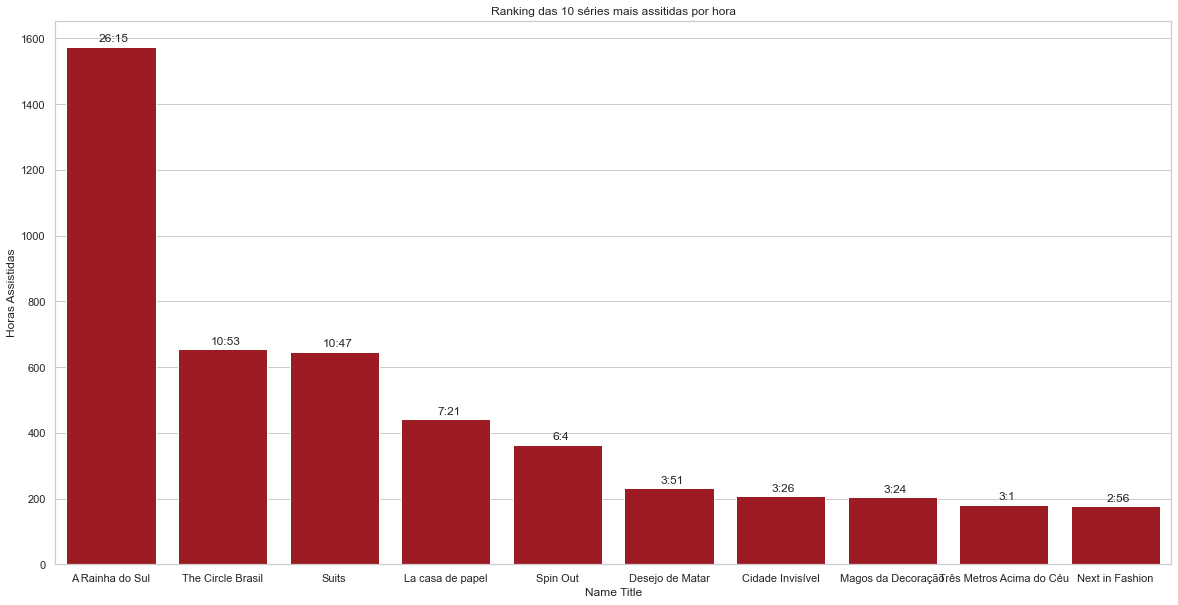

In [25]:
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
bars = sns.barplot( x=series_por_hora.index, y=series_por_hora.values,color='#B20710')
plt.ylabel('Horas Assistidas')
plt.title('Ranking das 10 séries mais assitidas por hora')

for bar in bars.patches:
  height = bar.get_height()
  plt.annotate('{}:{}'.format(int(height/60), int(height%60)),
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(3, 3),
              textcoords="offset points",
              ha='center', va='bottom')

plt.show()

# TOP 10 séries TV por visualização

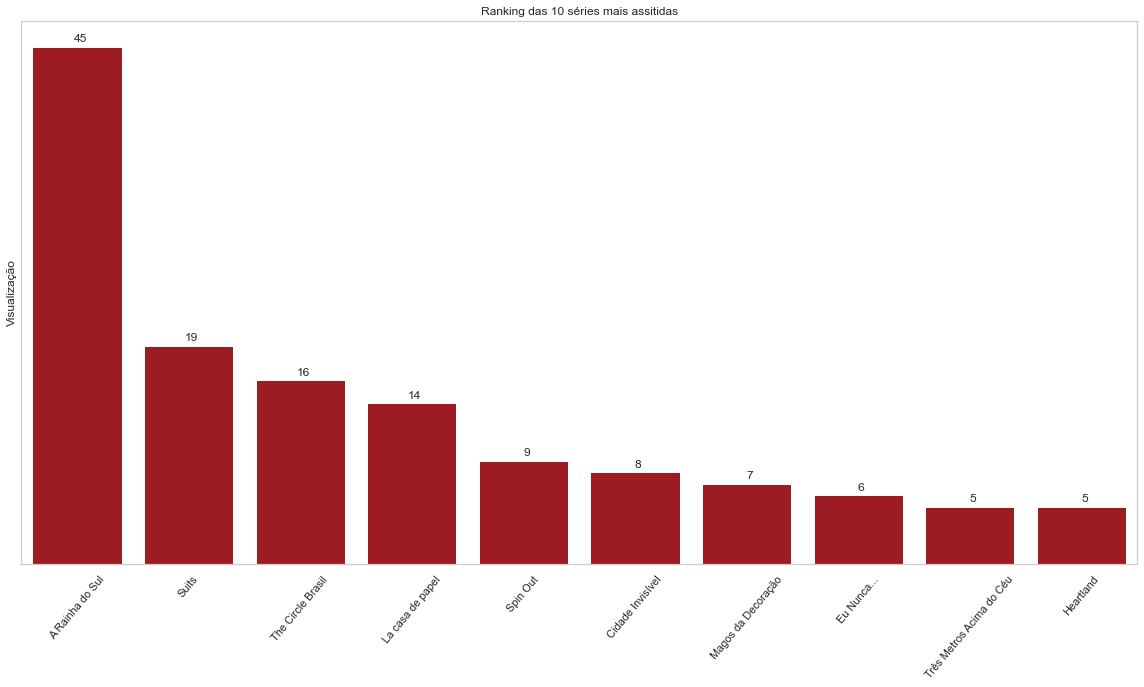

In [26]:
cont = df['Name Title'].value_counts().head(10)
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
bars = sns.barplot( x=cont.index, y=cont.values,color='#B20710')
plt.xticks(rotation = 50)
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('Visualização')
plt.title('Ranking das 10 séries mais assitidas')

for bar in bars.patches:
  height = bar.get_height()
  plt.annotate('{}'.format(int(height)),
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(3, 3),
              textcoords="offset points",
              ha='center', va='bottom')

plt.show()

# 10 episódios que mais vezes assisti

In [27]:
cont_visualização = df.groupby(['Name Title', 'Temporada', 'Episódio'])['Start Time'].agg(['count'])
cont_visualização.sort_values('count', ascending=False).head(10)

,,,count
Name Title,Temporada,Episódio,
Suits,Temporada 1,A regra do jogo (Episódio 11),3
La casa de papel,Parte 4,Aula de anatomia (Episódio 3),3
Cidade Invisível,Temporada 1,Eles estão entre nós (Episódio 3),2
The Circle Brasil,Temporada 1,Pintando Verdades (Episódio 8),2
Suits,Temporada 1,Briga de cachorro grande (Episódio 12),2
The Circle Brasil,Temporada 1,Sala Azul (Episódio 6),2
A Rainha do Sul,Temporada 2,Só o amor de mãe (Episódio 9),2
The Circle Brasil,Temporada 1,Lacrações Perigosas (Episódio 5),2
A Rainha do Sul,Temporada 2,O preço da fé (Episódio 7),2


<AxesSubplot:xlabel='Name Title,Temporada,Episódio'>

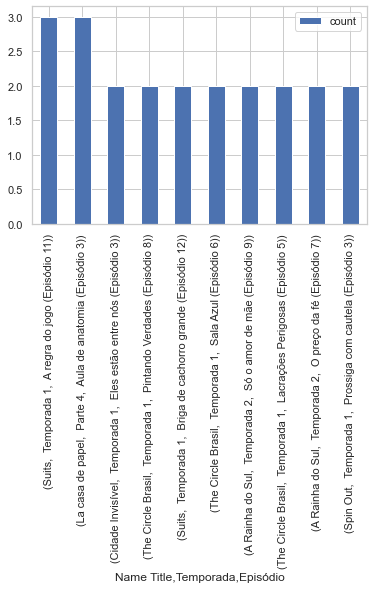

In [28]:
cont_visualização.sort_values('count', ascending=False).head(10).plot.bar()

# Qual programação mais vezes assisti

Text(0.5, 0, 'Quant. Visualização')

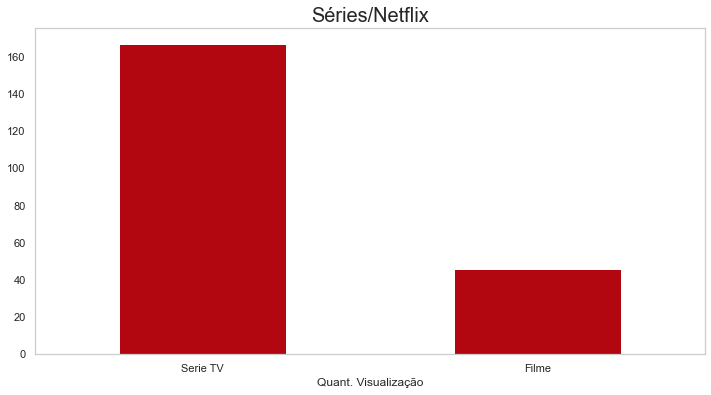

In [29]:
top_10 = df['Type View'].value_counts().head(10)
top_10.plot(kind='bar',figsize=(12,6), grid = False, rot=0,color='#B20710')
plt.title('Séries/Netflix', size=20)
plt.xlabel('Quant. Visualização')

In [30]:
df.head()

,Profile Name,Start Time,Duration,Device Type,Bookmark,Latest Bookmark,Country,Ano,Mês,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View,Parte do dia
64,Jheysson,2021-02-21 04:45:47,00:28:43,Samsung 2015 NT14M DTV Smart TV,00:29:22,00:29:22,BR (Brazil),2021,Fevereiro,21,4,Domingo,28.716667,0.478611,0.019942,Cidade Invisível,Temporada 1,É muito maior do que a gente (Episódio 7),Serie TV,Madrugada
65,Jheysson,2021-02-21 04:18:37,00:26:59,Samsung 2015 NT14M DTV Smart TV,00:27:36,00:27:36,BR (Brazil),2021,Fevereiro,21,4,Domingo,26.983333,0.449722,0.018738,Cidade Invisível,Temporada 1,Coisa de criança (Episódio 6),Serie TV,Madrugada
66,Jheysson,2021-02-21 03:47:16,00:31:13,Samsung 2015 NT14M DTV Smart TV,00:31:53,00:31:53,BR (Brazil),2021,Fevereiro,21,3,Domingo,31.216667,0.520278,0.021678,Cidade Invisível,Temporada 1,Você não vai acreditar em mim (Episódio 5),Serie TV,Madrugada
67,Jheysson,2021-02-21 03:12:37,00:34:23,Samsung 2015 NT14M DTV Smart TV,00:35:04,00:35:04,BR (Brazil),2021,Fevereiro,21,3,Domingo,34.383333,0.573056,0.023877,Cidade Invisível,Temporada 1,A Cuca vai pegar (Episódio 4),Serie TV,Madrugada
68,Jheysson,2021-02-21 03:09:33,00:02:06,Samsung 2015 NT14M DTV Smart TV,00:34:23,00:34:23,BR (Brazil),2021,Fevereiro,21,3,Domingo,2.100000,0.035000,0.001458,Cidade Invisível,Temporada 1,Eles estão entre nós (Episódio 3),Serie TV,Madrugada


In [31]:
# Ano que mais utilizei Netflix

df['Ano'].value_counts()

2020    205
2021      8
Name: Ano, dtype: int64

<AxesSubplot:>

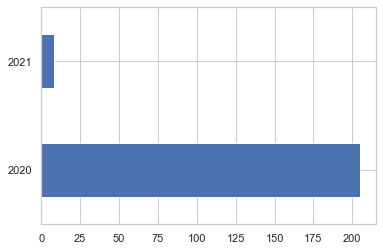

In [32]:
df['Ano'].value_counts().plot.barh()

In [33]:
# Mês que mais utilizei Netflix

df['Mês'].value_counts()

Maio         97
Abril        66
Junho        21
Outubro      10
Fevereiro     8
Setembro      8
Julho         2
Março         1
Name: Mês, dtype: int64

<AxesSubplot:>

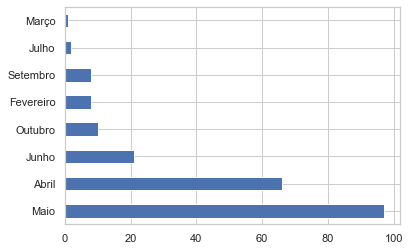

In [34]:
df['Mês'].value_counts().plot.barh()

In [35]:
# Dia que mais utilizei Netflix

df['Dia'].value_counts()

30    17
24    17
23    16
29    15
1     14
4     14
22    13
16    13
21    11
7      9
11     9
5      8
25     7
19     6
31     6
2      6
9      5
8      5
18     4
20     4
15     4
26     3
13     2
10     2
14     1
28     1
17     1
Name: Dia, dtype: int64

<AxesSubplot:>

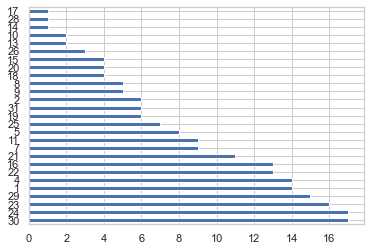

In [36]:
df['Dia'].value_counts().plot.barh()

In [37]:
# Dia da semana que mais utilizei Netflix

df['Dia da Semana'].value_counts()

Sexta-feira      46
Sábado           33
Domingo          32
Quinta-feira     31
Segunda-feira    31
Terça-feira      27
Quarta-feira     13
Name: Dia da Semana, dtype: int64

<AxesSubplot:>

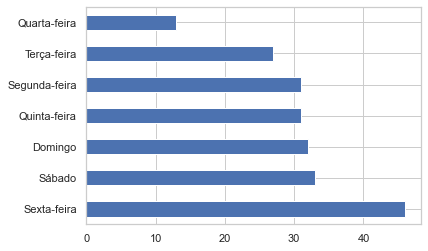

In [38]:
df['Dia da Semana'].value_counts().plot.barh()

In [39]:
# Dispositivo onde mais utlilizei Netflix

df['Device Type'].value_counts()

Samsung 2015 NT14M DTV Smart TV                104
Samsung 2018 Kant-M2 UHD TV (1.5G) Smart TV     65
Chrome PC (Cadmium)                             44
Name: Device Type, dtype: int64

In [40]:
#df['Device Type'].value_counts().plot.barh()

In [41]:
# Parte do dia que mais utilizei netflix

df['Parte do dia'].value_counts()

Madrugada    145
Manhã         36
Noite         22
Tarde         10
Name: Parte do dia, dtype: int64

<AxesSubplot:>

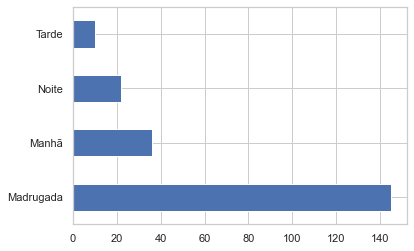

In [42]:
df['Parte do dia'].value_counts().plot.barh()

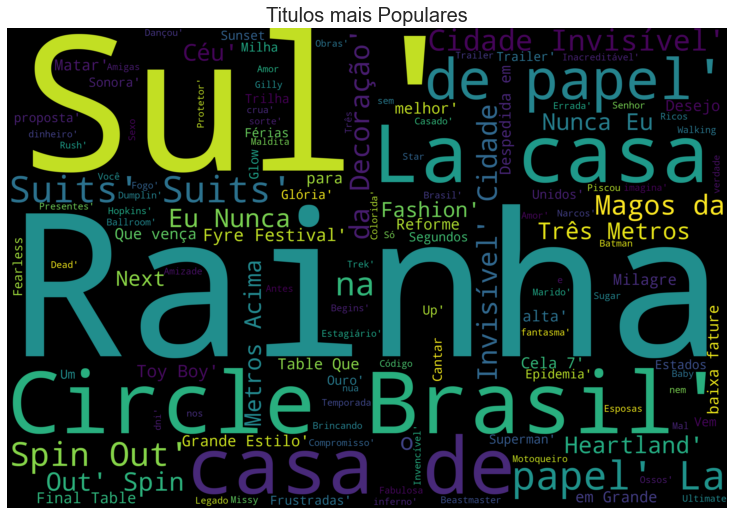

In [43]:
#nuvem de palavras das musicas
text = df['Name Title'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Titulos mais Populares', fontsize=20)
plt.show()

In [44]:
df.to_csv('APRESENTAÇÃO IFOOD/dados_NETFLIX.csv', index=False)